## Task-3 User Experience Analysis


#### Import Libraries and Load the Dataset

In [2]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)


# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import Postgres connection from DB_connection folder
from DBConnection.connection import PostgresConnection
from scripts.experience_analyzer import *

In [4]:
# Create an instance of the PostgresConnection class and connect to the database
db=PostgresConnection()
db.connect()

Connected to PostgreSQL database


In [5]:
# query to retrive all the data from xdr_data table
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [6]:
# Assign the data to a dataframe named 'df'
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Thu Apr 04 2019 15:01:18 GMT+0300 (East Africa...,770.0,Thu Apr 25 2019 17:35:31 GMT+0300 (East Africa...,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,Tue Apr 09 2019 16:04:04 GMT+0300 (East Africa...,235.0,Thu Apr 25 2019 11:15:48 GMT+0300 (East Africa...,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,Tue Apr 09 2019 20:42:11 GMT+0300 (East Africa...,1.0,Thu Apr 25 2019 14:58:13 GMT+0300 (East Africa...,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,Wed Apr 10 2019 03:31:25 GMT+0300 (East Africa...,486.0,Thu Apr 25 2019 10:36:35 GMT+0300 (East Africa...,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,Fri Apr 12 2019 23:10:23 GMT+0300 (East Africa...,565.0,Thu Apr 25 2019 13:40:32 GMT+0300 (East Africa...,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Aggregate Per Customer Information
- Handle Missing Values and Outliers: Replace missing values and outliers with the mean or mode.
- Aggregate Average Metrics Per Customer

In [7]:
experience_analyzer=ExperienceAnalyzer(df)

In [8]:
# Apply fill_missing_value function to fill all missing values in the dataframe df with mean and mode.
df = experience_analyzer.fill_missing_values()

In [9]:
# Apply the function to the DataFrame
aggregated_df = experience_analyzer.aggregate_customer_data(df)
# Renaming the columns for better readability
aggregated_df.columns = [
    'Customer Number', 'Avg TCP DL Retransmission', 'Avg TCP UL Retransmission',
    'Avg RTT DL', 'Avg RTT UL', 'Avg Throughput DL', 'Avg Throughput UL', 'Handset Type'
]

aggregated_df.head()

,Customer Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL,Avg RTT UL,Avg Throughput DL,Avg Throughput UL,Handset Type
0,3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778)
2,3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,undefined
3,3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457)
4,3.360101e+10,1.507977e+07,390430.332406,57.000000,2.500000,20197.5,8224.5,Apple iPhone Se (A1723)


#### Task 3.1 Compute Top, Bottom, and Most Frequent Values

In [10]:
# Example usage for TCP DL Retrans. Vol (Bytes)
tcp_dl_results_df = experience_analyzer.get_top_bottom_most_freq_values(df, 'TCP DL Retrans. Vol (Bytes)')
print(tcp_dl_results_df)

    Index  Top TCP DL Retrans. Vol (Bytes)   Index  \
0   77959                     4.294426e+09   59710   
1  135677                     4.291380e+09  125094   
2   34660                     4.289877e+09    2834   
3  140816                     4.289488e+09   39613   
4    3758                     4.288060e+09   52487   
5  119670                     4.275259e+09   60367   
6   39639                     4.268432e+09   60419   
7   76979                     4.259997e+09   75087   
8   59014                     4.256650e+09  100353   
9   41221                     4.254644e+09  143448   

   Bottom TCP DL Retrans. Vol (Bytes)  \
0                                 2.0   
1                                 2.0   
2                                 4.0   
3                                 4.0   
4                                 4.0   
5                                 4.0   
6                                 4.0   
7                                 4.0   
8                                 4.

#### Task 3.2 - Compute & list 10 of the top, bottom, and most frequent:

In [11]:
# Example usage for Avg RTT DL (ms)
rtt_dl_results_df = experience_analyzer.get_top_bottom_most_freq_values(df, 'Avg RTT DL (ms)')
print(rtt_dl_results_df)

    Index  Top Avg RTT DL (ms)   Index  Bottom Avg RTT DL (ms)  \
0   30182              96923.0   42640                     0.0   
1   29948              64640.0   52225                     0.0   
2   17939              55811.0   60145                     0.0   
3    5976              54847.0   61144                     0.0   
4   22897              26971.0   61337                     0.0   
5   23500              26250.0  103326                     0.0   
6    1372              25873.0  124544                     0.0   
7   81265              25602.0  142549                     0.0   
8   97354              25374.0  143895                     0.0   
9  100621              24733.0   71745                     2.0   

   Most Frequent Avg RTT DL (ms)  Frequency  
0                     109.795706      27829  
1                      28.000000       3553  
2                      27.000000       3380  
3                      34.000000       3296  
4                      35.000000       2892

In [12]:
# Example usage for Avg Bearer TP DL (kbps)
throughput_dl_results_df = experience_analyzer.get_top_bottom_most_freq_values(df, 'Avg Bearer TP DL (kbps)')
print(throughput_dl_results_df)

    Index  Top Avg Bearer TP DL (kbps)  Index  Bottom Avg Bearer TP DL (kbps)  \
0  120879                     378160.0     13                             0.0   
1  141270                     299257.0     15                             0.0   
2  143689                     299002.0    149                             0.0   
3  149618                     276040.0    548                             0.0   
4   92202                     269362.0    615                             0.0   
5  117780                     266332.0    620                             0.0   
6  115840                     265440.0    681                             0.0   
7   89576                     264448.0    809                             0.0   
8  116553                     263047.0    894                             0.0   
9   41588                     254253.0   1183                             0.0   

   Most Frequent Avg Bearer TP DL (kbps)  Frequency  
0                                   23.0       7324  


#### Task 3.3 - Compute & report:Distribution Analysis

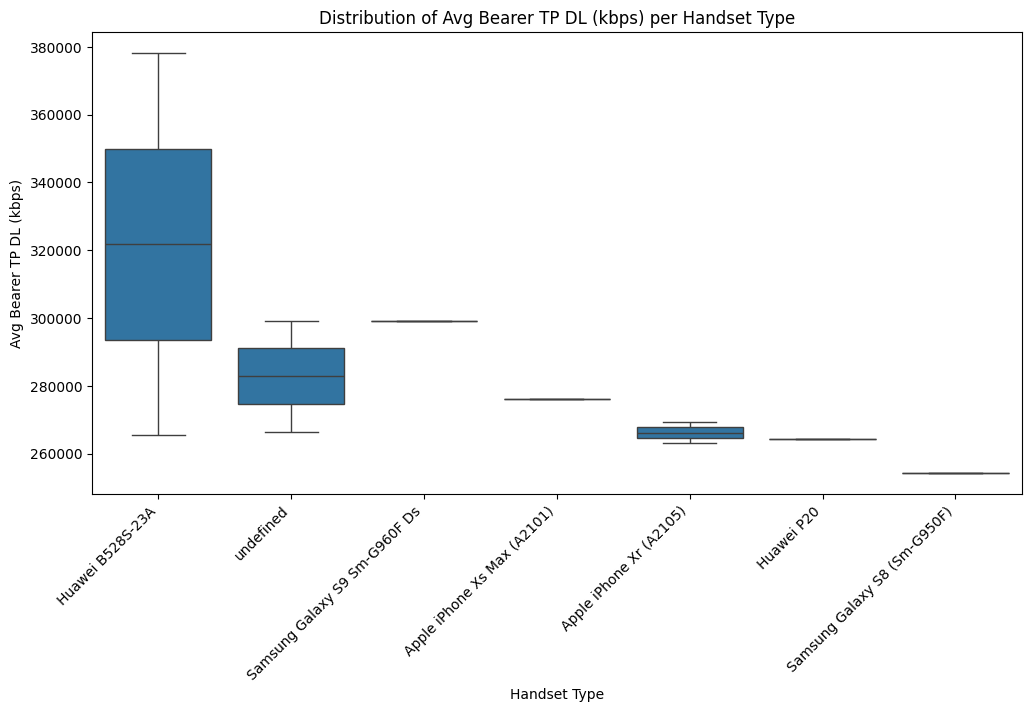

In [13]:
# Distribution of top 10 average throughput per handset type
experience_analyzer.plot_top_10_throughput_distribution(df)

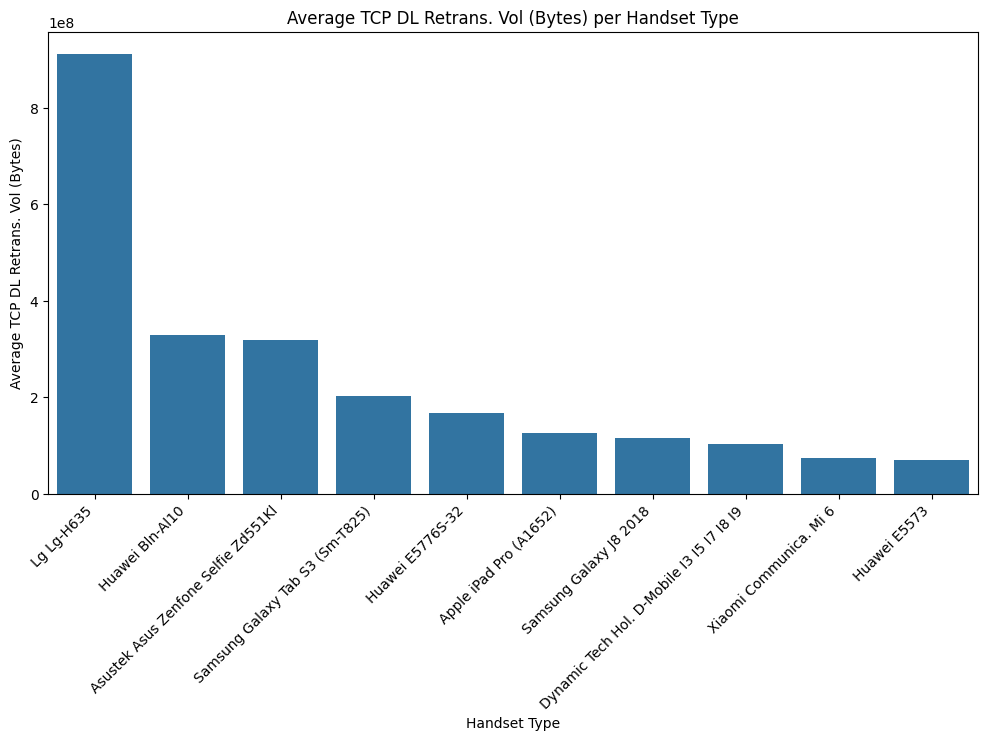

In [14]:
# Top 10 Average TCP retransmission per handset type
experience_analyzer.plot_top_10_tcp_retransmission(df)

#### K-Means Clustering to group customers based on their experience metrics
- ***K*** = 3

In [15]:
#Perform culstering
features_columns = ['Avg TCP DL Retransmission', 'Avg RTT DL', 'Avg Throughput DL']
cluster_description = experience_analyzer.perform_clustering(aggregated_df, features_columns)
cluster_description

,Customer Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL,Avg RTT UL,Avg Throughput DL,Avg Throughput UL,Experience Cluster
Experience Cluster,,,,,,,,
0,4.895114e+10,1.699673e+07,6.720060e+05,128.677660,14.704490,1945.719461,383.705131,0.0
1,3.367837e+10,7.691387e+07,1.932275e+06,67.990948,25.604348,76315.997248,8128.046819,1.0
2,3.367703e+10,1.724662e+07,6.690631e+05,90.649035,22.360286,31362.584487,4078.422167,2.0


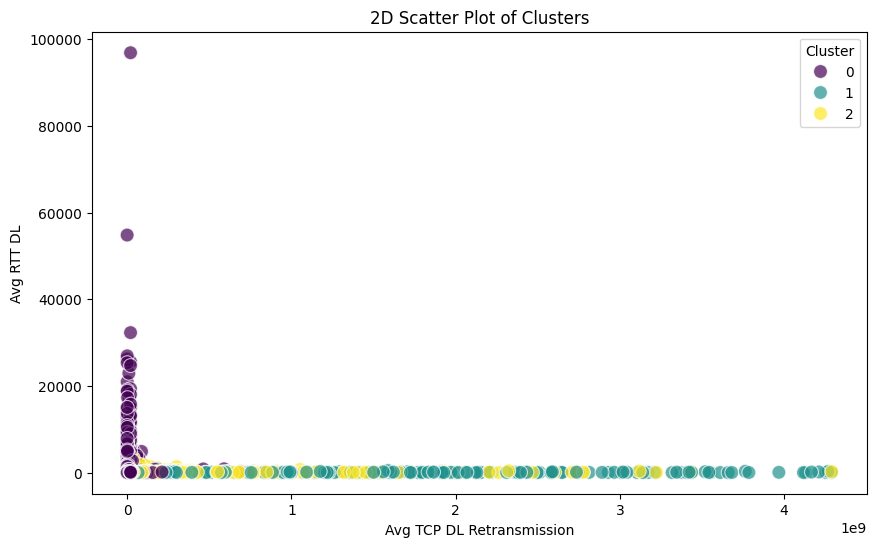

In [16]:
experience_analyzer.plot_2d_clusters(aggregated_df, 'Avg TCP DL Retransmission', 'Avg RTT DL')